In [1]:
# Question :-
# In this assignment candidate will train the model to detect the following:- 
# 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'.
# CIFAR-10 Dataset to be used for this Industry assignment.
# Remember :- we would need to do object detection and not classifciation.
# Reference :- p1_2.ipynb in the main branch of DL folder.

### CIFAR dataset

The CIFAR-10 "Canadian Institute for Advanced Research 10" dataset is a popular benchmark dataset for training and evaluating machine learning models, especially Convolutional Neural Networks (CNNs), in the field of computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

In [2]:
# Importing all the necessary libraries

from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow
import matplotlib
print(f"Tensorflow version:- {tensorflow.__version__}")
print(f"Matplotlib version:- {matplotlib.__version__}")
print(f"Numpy version:- {np.__version__}")

Tensorflow version:- 2.13.0
Matplotlib version:- 3.7.2
Numpy version:- 1.24.3


In [3]:
# Loading the data in train image, train labels and test image and test labels using load_data() method.

(X_train_images, y_train_labels), (X_test_images, y_test_labels) = cifar10.load_data()

The X_train_images array is a 4-dimensional NumPy array that holds the training images. Its shape is (num_samples, height, width, num_channels) where:

num_samples is the number of images in the training set.
height is the height of each image in pixels.
width is the width of each image in pixels.
num_channels is the number of color channels in each image (usually 3 for RGB images).
For the CIFAR-10 dataset specifically, X_train_images.shape would be something like (50000, 32, 32, 3), indicating that there are 50,000 training images, each with dimensions 32x32 pixels and 3 color channels (RGB).

In [4]:
# Dataset label numbers and there names

# 1 --> Airplane
# 2 --> Automobile
# 3 --> Bird
# 4 --> Cat
# 5 --> Deer
# 6 --> Dog
# 7 --> Frog
# 8 --> Horse
# 9 --> Ship
# 10 --> Truck

In [4]:
# Define class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Print labels and their corresponding class names
for label in y_train_labels[0:10:1]:  # Print the first 10 labels
    class_name = class_names[label[0]]
    print(f"Label: {label[0]} - Class Name: {class_name}")

Label: 6 - Class Name: Frog
Label: 9 - Class Name: Truck
Label: 9 - Class Name: Truck
Label: 4 - Class Name: Deer
Label: 1 - Class Name: Automobile
Label: 1 - Class Name: Automobile
Label: 2 - Class Name: Bird
Label: 7 - Class Name: Horse
Label: 8 - Class Name: Ship
Label: 3 - Class Name: Cat


In [7]:
# Display the information about the X_train_images

print(f"{' Information regarding the X_train_images ':#^70}", end = "\n\n")
print(f"X_train_images shape:- {X_train_images.shape}")
print(f"Number of sample images of X_train_images:- {X_train_images.shape[0]}")
print(f"X_train_images Image height :- {X_train_images.shape[1]}")
print(f"X_train_images Image width:- {X_train_images.shape[2]}")
print(f"X_train_images Colour channels:- {X_train_images.shape[3]}")
print(f"Shape of the first image in X_train_images:- {X_train_images[0].shape}")
print(f"Height of the first image in X_train_images:- {X_train_images[0].shape[0]}")
print(f"Width of the first image in X_train_images:- {X_train_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_train_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images and X_test_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_train_images:- {np.max(X_train_images[0])}")
print(f"Minimum value of the X_train_images:- {np.min(X_train_images[0])}")

############## Information regarding the X_train_images ##############

X_train_images shape:- (50000, 32, 32, 3)
Number of sample images of X_train_images:- 50000
X_train_images Image height :- 32
X_train_images Image width:- 32
X_train_images Colour channels:- 3
Shape of the first image in X_train_images:- (32, 32, 3)
Height of the first image in X_train_images:- 32
Width of the first image in X_train_images:- 32
Number of channels in the first image:- 3
Maximum value in X_train_images:- 255
Minimum value of the X_train_images:- 0


In [19]:
# Display the information of y_train_labels

print(f"{' Information of y_train_labels ':#^70}", end = "\n\n")
print(f"y_train_labels shape:- {y_train_labels.shape}")
print(f"Number of labels in the y_train_labels :- {y_train_labels.shape[0]}")
print(f"Labels of y_train_labels :- {y_train_labels.shape[1]}")
print("Number of classes:- ", len(set(y_train_labels.flatten()))) # (50000,)

################### Information of y_train_labels ####################

y_train_labels shape:- (50000, 1)
Number of labels in the y_train_labels :- 50000
Labels of y_train_labels :- 1
Number of classes:-  10


In [14]:
# Display the information about the X_test_images

print(f"{' Information regarding the X_test_images ':#^70}", end = "\n\n")
print(f"X_test_images shape:- {X_test_images.shape}")
print(f"Number of sample images of X_test_images:- {X_test_images.shape[0]}")
print(f"X_test_images Image height :- {X_test_images.shape[1]}")
print(f"X_test_images Image width:- {X_test_images.shape[2]}")
print(f"X_test_images Colour channels:- {X_test_images.shape[3]}")
print(f"Shape of the first image in X_test_images:- {X_test_images[0].shape}")
print(f"Height of the first image in X_test_images:- {X_test_images[0].shape[0]}")
print(f"Width of the first image in X_test_images:- {X_test_images[0].shape[1]}")
print(f"Number of channels in the first image:- {X_test_images[0].shape[2]}")
# Finding out what is the mininum and maximum value in X_train_images
# Before pre-processing the image data. Color channels ranges from 0 to 255
print(f"Maximum value in X_test_images:- {np.max(X_test_images[0])}")
print(f"Minimum value of the X_test_images:- {np.min(X_test_images[0])}")

############## Information regarding the X_test_images ###############

X_test_images shape:- (10000, 32, 32, 3)
Number of sample images of X_test_images:- 10000
X_test_images Image height :- 32
X_test_images Image width:- 32
Colour channels:- 3
Shape of the first image in X_test_images:- (32, 32, 3)
Height of the first image in X_test_images:- 32
Width of the first image in X_test_images:- 32
Number of channels in the first image:- 3
Maximum value in X_test_images:- 255
Minimum value of the X_test_images:- 13


In [20]:
# Display the information of y_test_labels

print(f"{' Information of y_test_labels ':#^70}", end = "\n\n")
print(f"y_test_labels shape:- {y_test_labels.shape}")
print(f"Number of labels in the y_test_labels :- {y_test_labels.shape[0]}")
print(f"Labels of y_test_labels :- {y_test_labels.shape[1]}")
print("Number of classes:- ", len(set(y_test_labels.flatten()))) # (10000,)

#################### Information of y_test_labels ####################

y_test_labels shape:- (10000, 1)
Number of labels in the y_test_labels :- 10000
Labels of y_test_labels :- 1
Number of classes:-  10


In [26]:
# Preprocessing the train images and test images. 
# Normalizing the values from 0 to 255 to 0.0 to 1.0 
# using float of maximum in first image of X_train_images and X_test_images

X_train_images = X_train_images / float(np.max(X_train_images[0]))
X_test_images = X_test_images / float(np.max(X_test_images[0]))

In [27]:
# After processing of the image data

print("Maximum value of the train images:- ", np.max(X_train_images))
print("Minimum value of the train images:- ", np.min(X_train_images))

Maximum value of the train images:-  1.0
Minimum value of the train images:-  0.0


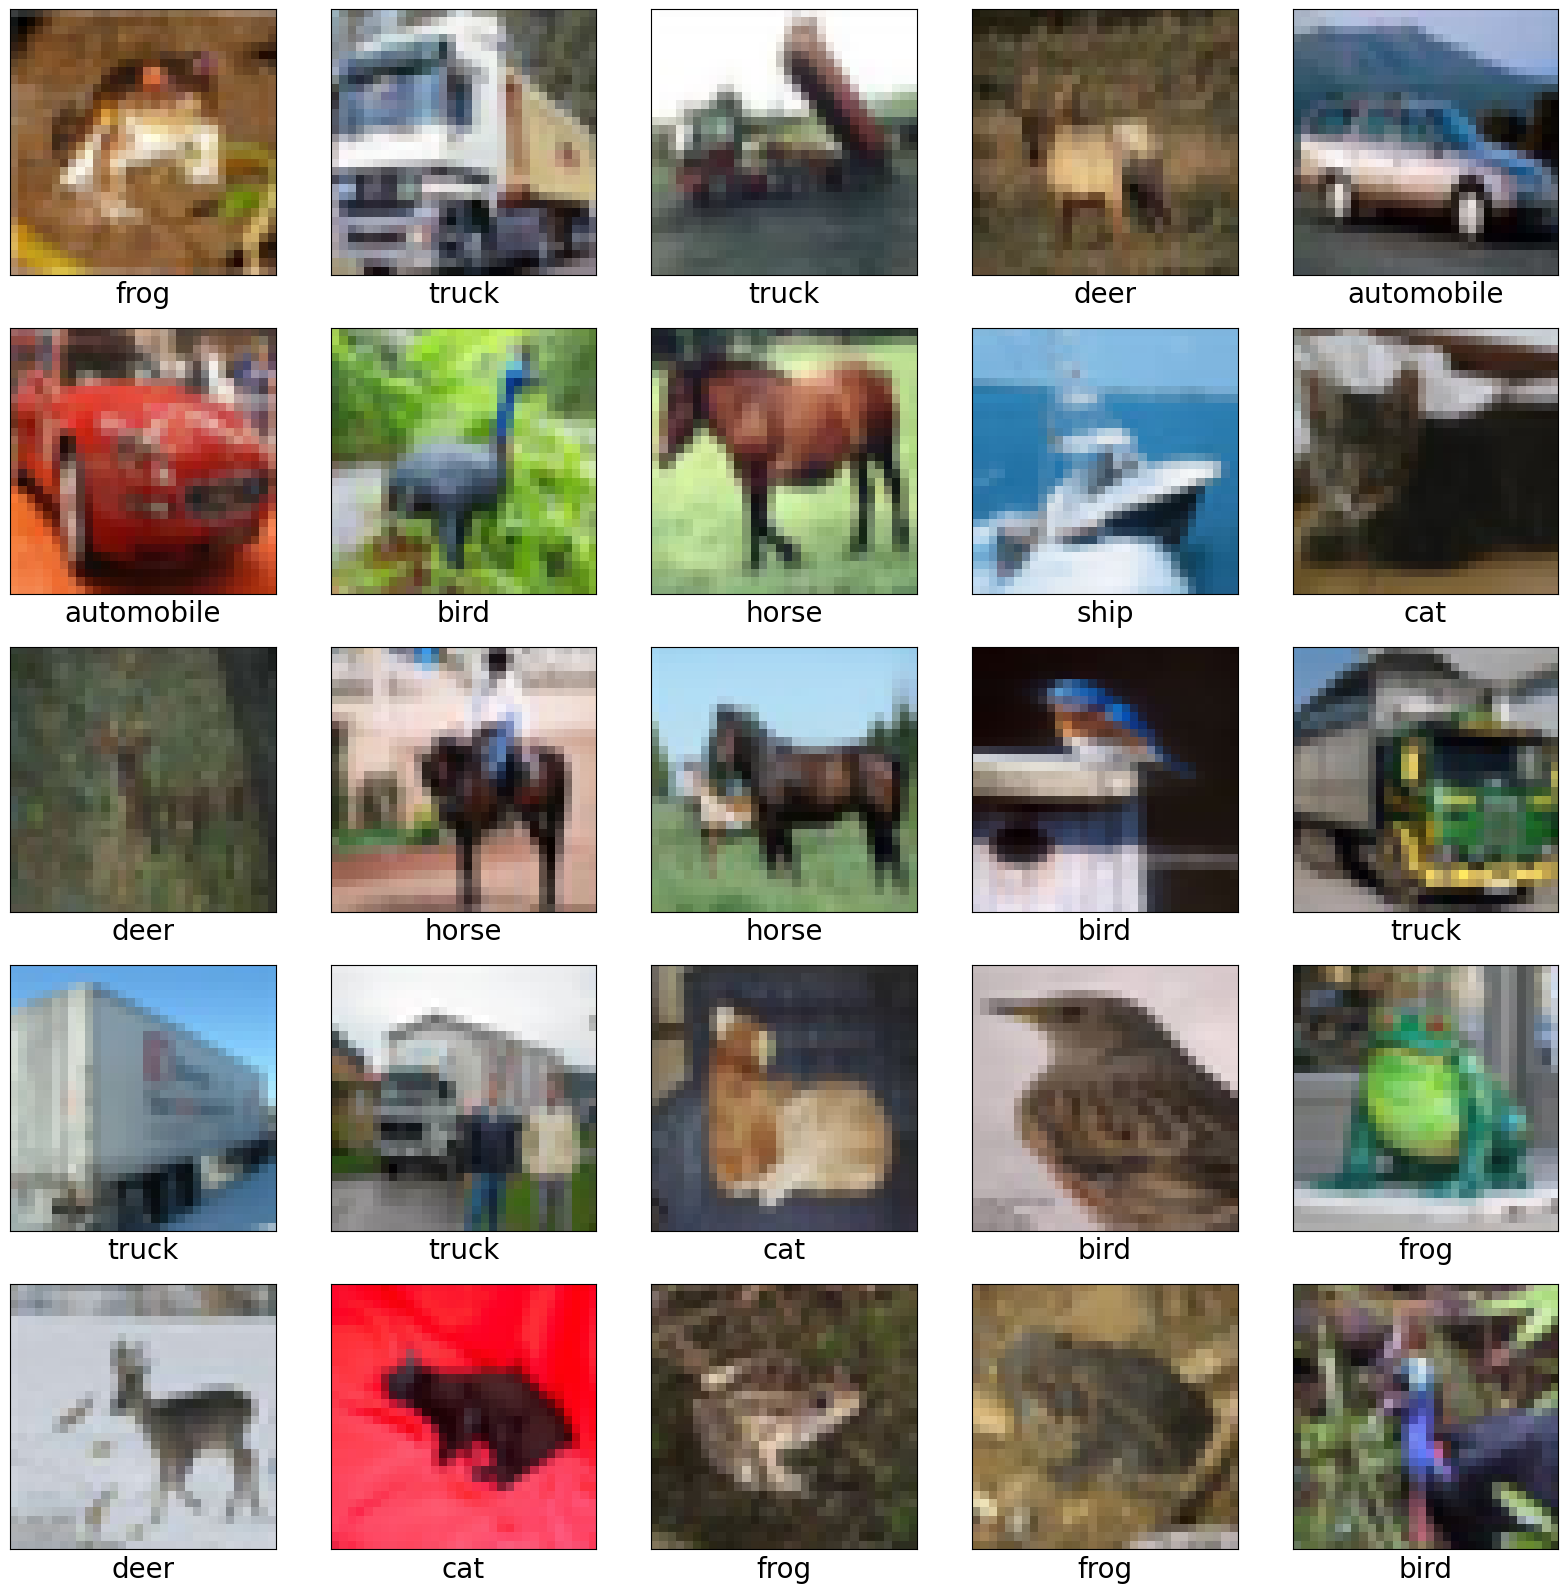

In [10]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    # plt.grid(True)
    plt.imshow(X_train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why we would need the extra index
    plt.xlabel(class_names[y_train_labels[i][0]], fontsize = 20)

plt.tight_layout()
plt.show()

In [11]:
# Now!, We can proceed with the creation of the CNN model

model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = "relu", input_shape = (32, 32, 3)),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
        Flatten(),
        Dense(units = 64, activation = "relu"),
        Dense(10)
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [14]:
# compile a and train the model.

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

history = model.fit(X_train_images, y_train_labels, epochs = 10, validation_data = (X_test_images, y_test_labels))

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.5325 - accuracy: 0.4427 - val_loss: 1.3152 - val_accuracy: 0.5208
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1651 - accuracy: 0.5880 - val_loss: 1.1766 - val_accuracy: 0.5805
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0167 - accuracy: 0.6426 - val_loss: 0.9784 - val_accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9210 - accuracy: 0.6769 - val_loss: 0.9644 - val_accuracy: 0.6618
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8447 - accuracy: 0.7031 - val_loss: 0.9314 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7801 - accuracy: 0.7268 - val_loss: 0.9119 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7279 - accuracy: 0.7429 - val_loss: 0.8610 -

In [ ]:
# Saving the entire model (Architecture and Weights) in current working directory.

model.save("IA_1_model.h5")

In [ ]:
model = load_model("IA_1_model.h5")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

# Plot of model accuracy
ax1.subplot()
ax1.plot(history.history["accuracy"], label = "accuracy")
ax1.plot(history.history["val_accuracy"], label = "val_accuracy")
ax1.xlabel("Epoch")
ax1.ylabel("Accuracy")
ax1.legend(loc = "upper left")

# Plot for model loss
ax2.plot(history.history["loss"], label = "Loss")
ax2.plot(history.history["val_loss"], label = "Val loss")
ax2.title("Model loss")
ax2.xlabel("Epochs")
ax2.ylabel("Loss")
ax2.legend(["Loss", "Val loss"], loc = 'upper right')
ax2.plot()

# Adjust layout for better spacing between subplots
plt.tight_layout()

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels, verbose = 2)

313/313 - 4s - loss: 0.9458 - accuracy: 0.6848 - 4s/epoch - 11ms/step


In [18]:
print(f"{round(test_acc * 100, 3) } %")

68.48 %


In [ ]:
# Model prediction and classification report
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

# Generating the classification report
print("Classification report")
print(classification_report(y_test_true_labels, y_test_pred_labels))

In [ ]:
# Generate the Confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix in the form of heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
xtickslabels = range(0, 10, 1)
ytickslabels = range(0, 10, 1)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()


In [ ]:
# Visualization of predicted data

# Model prediction
X_test_predictions = model.predict(X_test_images)
y_test_pred_labels = np.argmax(X_test_predictions, axis = 1)

# Convert to one-hot encoding test_labels back to integers
y_test_true_labels = np.argmax(y_test_labels, axis = 1)

plt.figure(figsize = (15, 15))
for i in range(0, 25, 1):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_images[i], cmap = "gray")
    plt.title(f"True label :- {y_test_true_labels[i]}", fontsize = 20)
    plt.xlabel(f"Pred label:- {y_test_pred_labels[i]}", fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
# plot the model # https://graphviz.gitlab.io/download/
# Download and run the graphviz-8.1.0 (64-bit) EXE installer [sha256] and 
# click to checbox of add environment variable to all user and icon in desktop
# pip install pydot and ( --> Seperate installation )pip install graphviz
# Check in terminal `` dot -v `` for successful installation.
plot_model(model, to_file = "p3_model_diagram.png", show_shapes = True, show_layer_names = True)

In [ ]:
# Method 2:-
# Visualizing the NN model through netron
# pip install netron
# After successful installation type ```netron``` in terminal. It will open in localhost

In [ ]:
# Method 3 # Tensorboard method

from tensorflow.keras.callbacks import TensorBoard

# All callbacks will be saved in logs folder.
model_callbacks = TensorBoard(log_dir = "p3_logs")

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

model.fit(x = X_train_images, y = y_train_labels, 
                epochs = 5, validation_split = 0.1, 
                validation_data = (X_test_images, y_test_labels), 
                shuffle = True, callbacks = model_callbacks)

# in terminal type :- tensorboard --logdir=p3_logs

In [19]:
# TODO: classification report, Confusion matrix